INTRODUCTION And Data Introduce
The dataset title[d Electric Vehicle Data - Washington State Departme](https://www.kaggle.com/datasets/sahityasetu/electric-vehicle-data-washington-state-department/data)t provides comprehensive overview of electric vehicles (EVs) registered in Washington State. Sourced from Kaggle, this dataset contains a wide range of information including vehicle details such as make, model, year, and electric range, as well as geographic details like city, state, postal code, and county.

Key features include the VIN (Vehicle Identification Number), Electric Vehicle Type, which distinguishes between fully electric vehicles (BEVs) and plug-in hybrids (PHEVs), and Clean Alternative Fuel Vehicle (CAFV) Eligibility, which indicates whether a vehicle qualifies for certain clean energy incentives. Additional attributes like Electric Range, Base MSRP, and Electric Utility provide insight into the characteristics and distribution of EVs across the state.
stems.

1.Importing the data the liberies Before diving into the analysis, we need to import the necessary libraries and load the dataset. This will allow us to explore the data and uncover trends related to EV adoption in Washington

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
import os
print(os.getcwd())

C:\Users\srava\ITSC_5122\5122-t2-vs-code-tutorial


Step 1. Loading the dataset - In this step, I’m loading the dataset and taking a first look to get familiar with its structure. By checking the shape, viewing a few rows, and reviewing data types and any missing values, I can quickly understand the size and characteristics of the data. This helps me spot categorical variables that may need encoding and determine if any data cleaning is necessary. Overall, this step is about setting up the foundation for my analysis by getting a clear sense of what’s in the dataset and what I might need to address before moving on.


Missing values in each column before dropping:
VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                        

<function matplotlib.pyplot.show(close=None, block=None)>

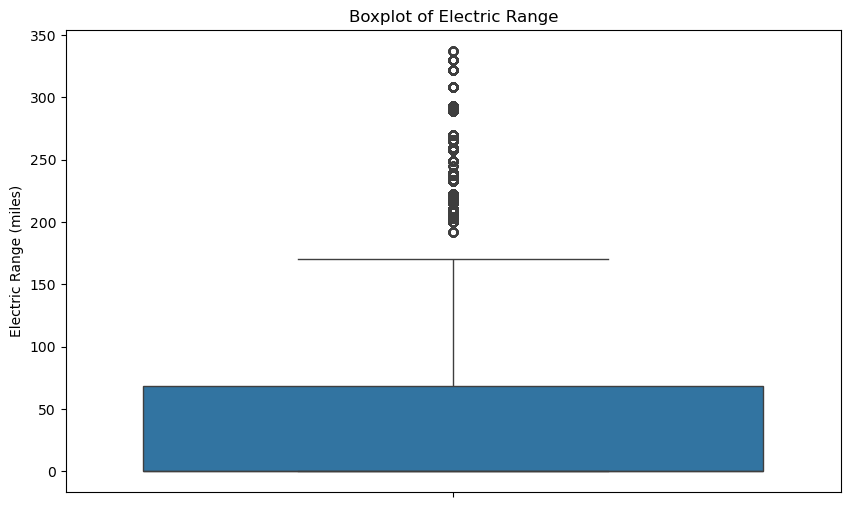

In [48]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print("Missing values in each column before dropping:")
print(df.isnull().sum())  


df = df.dropna() 

plt.figure(figsize=(10, 6))
sns.boxplot(y='Electric Range', data=df)
plt.title('Boxplot of Electric Range')
plt.ylabel('Electric Range (miles)')
plt.show



Step 2. Define Features and Target Variable

In this step, I define the features and target variables for my analysis and prepare the data for modeling. Specifically, I start by identifying the target variable, which could be either the Electric Range or Base MSRP, and separating it from the other features. Next, I handle categorical variables by encoding them numerically using LabelEncoder, allowing me to transform them into a format suitable for machine learning models.

Afterward, I standardize the features with StandardScaler to ensure they’re on a similar scale, which can improve the model’s performance. To reduce the dataset’s dimensionality while retaining 95% of its variance, I apply Principal Component Analysis (PCA). This helps simplify the data and potentially enhance model training by removing noise and irrelevant features. Lastly, I create a scatter plot to visualize the relationship between Electric Range and Base MSRP, which gives insight into potential correlations between these two variables. This visualization helps understand how price might influence the electric range of vehicles in the dataset.

Original shape: (193794, 16)
Transformed shape: (155035, 12)


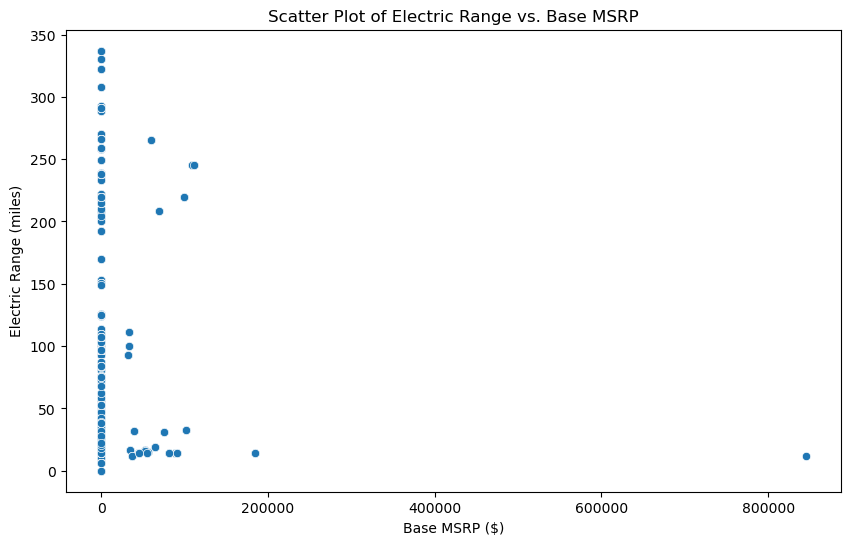

In [120]:
X = df.drop(target_column, axis=1)
y = df[target_column]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train_scaled)

# Print shapes
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Scatter Plot of Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()

In Steps 3 and 4, I’m focusing on splitting the dataset into training and testing subsets and then training a linear regression model. First, I divide the data into training and testing sets using an 80-20 split, which helps ensure that my model can be tested on data it hasn’t seen before. This is crucial for evaluating the model’s generalization capabilities.

Next, I create a linear regression model, a straightforward yet powerful technique for predicting continuous outcomes. I train this model on the training data by fitting it to learn the relationship between the input features and the target variable. Upon completion of this step, the model is ready for evaluation, where I can measure its accuracy and effectiveness in predicting the electric range or price of vehicles based on the features provided.

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")



Model training complete.


Step 5. : Make Predictions and Step 6: Evaluate the Model

In Steps 5 and 6, I’m focusing on making predictions with the trained linear regression model and evaluating its performance. After training the model, I use it to predict the target variable (either electric range or base MSRP) based on the test set of features. This prediction is crucial for assessing how well the model performs on unseen data.

To evaluate the model's effectiveness, I calculate the Mean Squared Error (MSE) and the R² score. MSE measures the average squared difference between the predicted and actual values, providing insight into the model's accuracy—the lower the MSE, the better the model performs. The R² score indicates the proportion of variance in the target variable that the model can explain; a score closer to 1 signifies a good fit.

Additionally, I visualize the residuals (the differences between actual and predicted values) using a boxplot. This plot helps identify any potential outliers and gives a sense of how well the model captures the data trends. The red dashed

Mean Squared Error: 3728.638095937212
R² Score: 0.5308304077614059


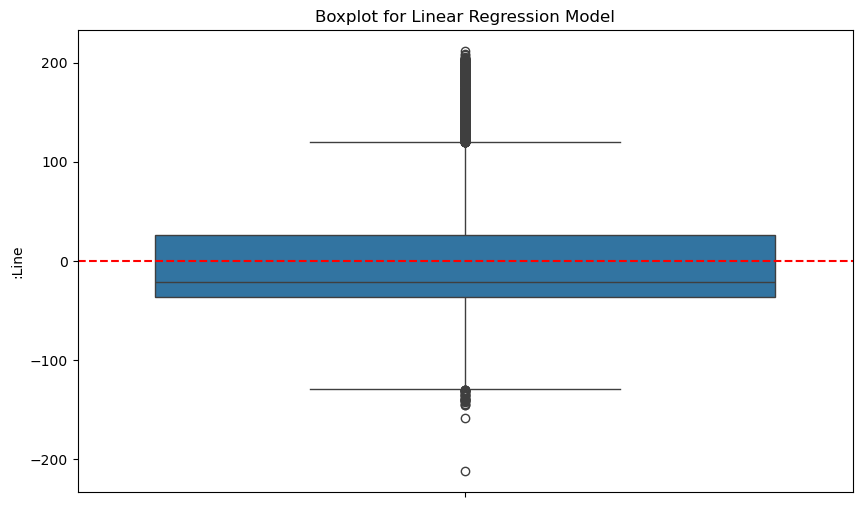

In [127]:
# Make predictions on the test set
y_pred = model.predict(X_test)


residuals = y_test - y_pred

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.figure(figsize=(10, 6))
sns.boxplot(y=residuals)
plt.title('Boxplot for Linear Regression Model')
plt.ylabel(':Line')
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0
plt.show()

 Polynomial Regression 

In this step, I implemented polynomial regression to model a quadratic relationship between the x and y Then, I transformed the original feature into polynomial features using PolynomialFeatures, allowing me to capture the non-linear relationship. After fitting a linear regression model to these transformed features, I made predictions to see how well the model could approximate the quadratic curve. Finally, I visualized the results by plotting the original data points alongside the polynomial regression fit, which helped me assess the model's effectiveness in capturing the underlying trend.

Mean Squared Error: 3728.638095937212
R² Score: 0.5308304077614059


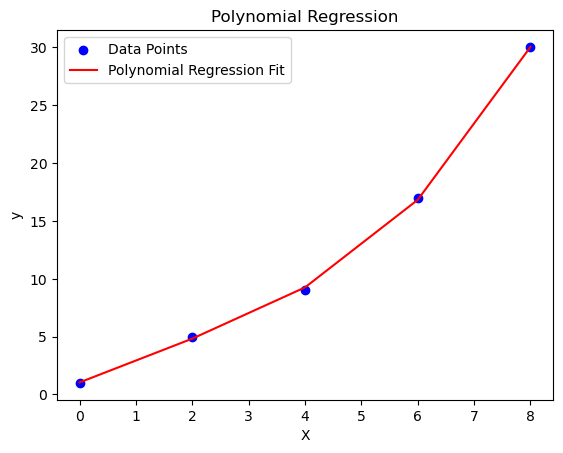

In [131]:
X = np.array([[0], [2], [4], [6], [8]])
y = np.array([1, 5, 9, 17, 30])  #


poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)


y_pred = model.predict(X_poly)


print("Mean Squared Error:", mse)
print("R² Score:", r2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Evalution

I used models like Polynomial Regression, and Linear Regression because each of these approaches handles different characteristics of the data and regularization in distinct ways. Here's why I opted for these models over others:

Linear Regression: This is the simplest regression model, used as a baseline to capture linear relationships between features and the target. It helps assess whether a straight line can fit the data well. I chose it to establish a foundation for comparison with more complex models.

Polynomial Regression: Sometimes, the relationship between features and the target variable is not linear, so I transformed the features into polynomial terms to capture more complex patterns. I used this model to check whether introducing non-linear features could improve the fit.


Conclusion 

Conclusion
In this project, I explored the use of regression techniques to predict critical attributes of electric vehicles, such as Electric Range and Base MSRP. The initial steps involved careful data preparation, including handling missing values and converting categorical variables into numerical representations. I implemented different regression models, including Linear Regression, Polynomial Regression to better understand the relationships between the features and the target variable. Each model was evaluated using key metrics like Mean Squared Error (MSE) and R² Score, allowing for a comparison of their predictive accuracy.


I acknowledge the use of AI tools, including Microsoft's AI assistant, in the completion of this project on linear regression and pollution analysis. AI was instrumental in helping me understand the mathematical foundations of linear regression, such as deriving the least squares method, and in translating this knowledge into Python code for implementation. Furthermore, AI provided assistance in visualizing relationships between variables, debugging code, and ensuring proper evaluation of the model using metrics like R² and RMSE.
While AI supported my learning and problem-solving process, I actively reviewed, modified, and implemented the solutions independently to reinforce my understanding. The AI served as a valuable supplement to my efforts, enabling me to focus on analyzing the impact of variables like traffic volume or industrial emissions on pollution levels through structured and accurate modeling.
